In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
wakuwaku = pd.Series([3.5, 4.2, 4.9, 4.6, 2.8, 5.6, 4.2, 4.9, 4.4, 3.7,
 3.8, 4.0, 5.2, 3.9, 5.6, 5.3, 5.0, 4.7, 4.0, 3.1,
 5.8, 3.6, 6.0, 4.2, 5.7, 3.9, 4.7, 5.3, 5.5, 4.7,
 6.4, 3.8, 3.9, 4.2, 5.1, 5.1, 4.1, 3.6, 4.2, 5.0,
 4.2, 5.2, 5.3, 6.4, 4.4, 3.6, 3.7, 4.2, 4.8])
 
mogumogu = pd.Series([4.5, 4.2, 3.9, 6.6, 0.8, 5.6, 3.2, 6.9, 4.4, 4.7,
 3.8, 3.0, 3.2, 4.9, 7.6, 3.3, 7.0, 3.7, 3.0, 4.1,
 5.8, 4.6, 4.0, 2.2, 7.7, 3.9, 6.7, 3.3, 7.5, 2.7,
 5.4, 5.8, 5.9, 3.2, 5.1, 3.1, 6.1, 4.6, 2.2, 4.0,
 6.4, 5.2, 3.3, 6.4, 6.4, 2.6, 2.6, 5.2, 5.8])

In [4]:
wakuwaku.describe().round(3)

count    49.000
mean      4.571
std       0.834
min       2.800
25%       3.900
50%       4.400
75%       5.200
max       6.400
dtype: float64

In [5]:
mogumogu.describe().round(3)

count    49.000
mean      4.614
std       1.624
min       0.800
25%       3.300
50%       4.500
75%       5.800
max       7.700
dtype: float64

In [6]:
wakuwaku.var(), wakuwaku.var(ddof=0)
#wakuwaku.var(ddof=False), wakuwaku.var(ddof=True), wakuwaku.var(ddof=2)

(0.6950000000000002, 0.6808163265306124)

In [7]:
bins = np.arange(0,9)
waku_cut = pd.cut(wakuwaku, bins)

In [8]:
pd.value_counts(waku_cut, sort=False)

(0, 1]     0
(1, 2]     0
(2, 3]     1
(3, 4]    14
(4, 5]    19
(5, 6]    13
(6, 7]     2
(7, 8]     0
dtype: int64

In [9]:
pd.value_counts(pd.cut(mogumogu,bins), sort=False)

(0, 1]     1
(1, 2]     0
(2, 3]     7
(3, 4]    13
(4, 5]     8
(5, 6]     9
(6, 7]     8
(7, 8]     3
dtype: int64

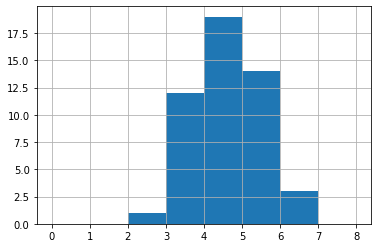

In [11]:
wakuwaku.hist(bins=bins)


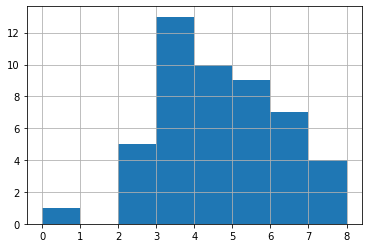

In [12]:
mogumogu.hist(bins=bins)

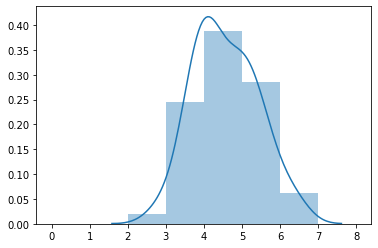

In [15]:
import seaborn as sns
sns.distplot(wakuwaku,bins=range(9))

In [6]:
fes = pd.read_csv('C:/Users/takah/imas/FES.csv')
fes.head()

,Unnamed: 0,rank,new
0,1,SR,1
1,2,R,0
2,3,SR,0
3,4,R,0
4,5,SR,0


In [34]:
rank_table = fes.groupby("rank").count()["Unnamed: 0"]
rank_table = fes.groupby("rank").count()["Unnamed: 0"].reset_index()


In [22]:
n = fes.count()["rank"]
n

150

In [39]:
rank_table["%"] = rank_table["Unnamed: 0"]/n*100
rank_table = rank_table.round(1)
rank_table

,rank,Unnamed: 0,%
0,R,113,75.3
1,SR,31,20.7
2,SSR,6,4.0


In [41]:
new_table = fes.groupby("new").count()["Unnamed: 0"].reset_index()
new_table

,new,Unnamed: 0
0,0,139
1,1,11


In [42]:
new_table["%"] = new_table["Unnamed: 0"]/n*100
new_table = new_table.round(1)
new_table

,new,Unnamed: 0,%
0,0,139,92.7
1,1,11,7.3


In [53]:
import math
p = 0.04
p0 = 0.06
z = (p-0.06)/math.sqrt(((1-0.06)*0.06)/n)
z = round(z,3)
print(z)

-1.031


In [75]:
from scipy import stats
alpha = 0.05 #有意水準

z_value = round(stats.norm.ppf(1-alpha/2),3)
print(z_value)

1.96


In [57]:
if -z_value < z < z_value:
    print("z値は", z_value, "なので、帰無仮説を採択し、対立仮説を棄却するという結果になり、",
          "この端末におけるフェスでSSRが出る確率は6%ではないとは言えず、この端末におけるフェスでSSRの出る確率が6%ではないとは言えないと結論づけられます。")
    
else:
    print("z値は", z_value, "なので、帰無仮説を棄却し、対立仮説を採択するという結果になり、",
          "この端末におけるフェスでSSRが出る確率は6%ではなく、この端末におけるフェスでの確率は歪んでいると結論づけられます。")

z値は 1.96 なので、帰無仮説を採択し、対立仮説を棄却するという結果になり、 この端末におけるフェスでSSRが出る確率は6%ではないとは言えず、この端末におけるフェスでSSRの出る確率が6%ではないとは言えないと結論づけられます。


In [66]:
z1 = round(2*n*(p*math.log(p/0.06)+(1-p)*math.log((1-p)/(1-0.06))),3)
print(z1)
chi2 = z1

1.198


In [71]:
chi2_value = round(stats.chi2.ppf(1-alpha, 1),3)
chi2_value

3.841

In [72]:
if chi2 < chi2_value:
    print("カイ二乗の値は", chi2_value, "なので、帰無仮説を採択し、対立仮説を棄却するという結果になり、",
          "この端末におけるフェスでSSRが出る確率は6%ではないとは言えず、この端末におけるフェスでSSRの出る確率が6%ではないとは言えないと結論づけられます。")
    
else:
    print("カイ二乗の値は", chi2_value, "なので、帰無仮説を棄却し、対立仮説を採択するという結果になり、",
          "この端末におけるフェスでSSRが出る確率は6%ではなく、この端末におけるフェスでの確率は歪んでいると結論づけられます。")

カイ二乗の値は 3.841 なので、帰無仮説を採択し、対立仮説を棄却するという結果になり、 この端末におけるフェスでSSRが出る確率は6%ではないとは言えず、この端末におけるフェスでSSRの出る確率が6%ではないとは言えないと結論づけられます。
